# Basic Shapes

In this module, you will familiarize yourself with the basics of persistence diagrams and the ripser library.  
* Bullet points indicate exercises or questions to be performed by the student(s)

First, we perform all of the necessary library imports.  

In [1]:
!pip install ripser

     |████████████████████████████████| 81kB 5.2MB/s 
  Created wheel for ripser: filename=ripser-0.4.1-cp36-cp36m-linux_x86_64.whl size=423331 sha256=5a7acb3aaa2784f625a1fcfa4ddfd8bcf62368872f3dd8eaad478dc91afe8a9d
  Stored in directory: /root/.cache/pip/wheels/d4/12/da/56d55c3af62ebd5e0684d521f3e58c1a85ac312502c9e2d47d
Successfully built ripser


In [0]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ripser import ripser
from persim import plot_diagrams
import time

## Example 1: Circles

As a first example, we will make a circle.  Once you understand this example, starting from the code below, see if you can modify the point cloud or come up with a new point cloud that does the following

### Exercises / Questions
* Increase the birth time of the H1 dot without changing the radius of the circle
* Decrease the birth time of the H1 dot without changing the radius of the circle
* What happens to H1 when you add a point that's at the center of the circle at position $(0, 0)$?
* Change the point cloud so that there are two 1D dots with large (>1) but different persistences

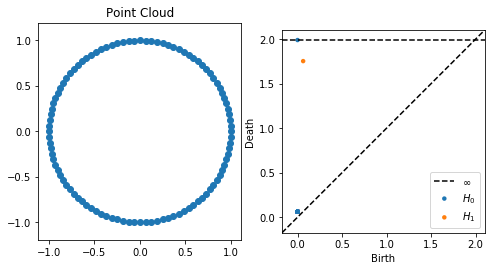

In [3]:
# Create 100 points on the unit circle
N = 100
t = np.linspace(0, 2*np.pi, N+1)[0:N]
X = np.zeros((N, 2))
X[:, 0] = np.cos(t)
X[:, 1] = np.sin(t)


# Compute the persistence diagram of this point cloud
dgms = ripser(X)['dgms']

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.title("Point Cloud")
plt.subplot(122)
plot_diagrams(dgms)
plt.show()

### Answers


#### Question 1
Increase the birth time of the H1 dot without changing the radius of the circle


* Make number of points on circle lower.

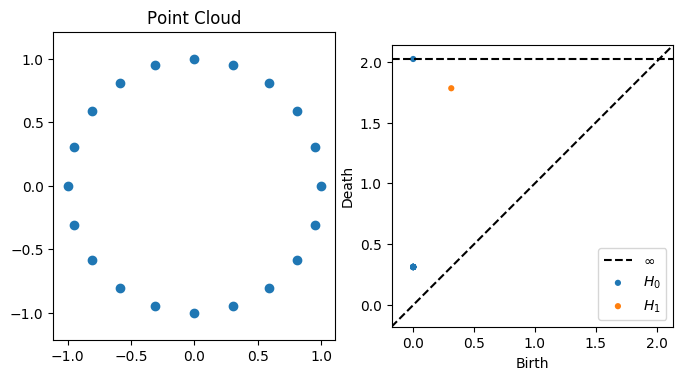

In [5]:
N = 20
t = np.linspace(0, 2*np.pi, N+1)[0:N]
X = np.zeros((N, 2))
X[:, 0] = np.cos(t)
X[:, 1] = np.sin(t)


# Compute the persistence diagram of this point cloud
dgms = ripser(X)['dgms']

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.title("Point Cloud")
plt.subplot(122)
plot_diagrams(dgms)
plt.show()

#### Question 2
Decrease the birth time of the H1 dot without changing the radius of the circle


* Make number of points on circle higher.

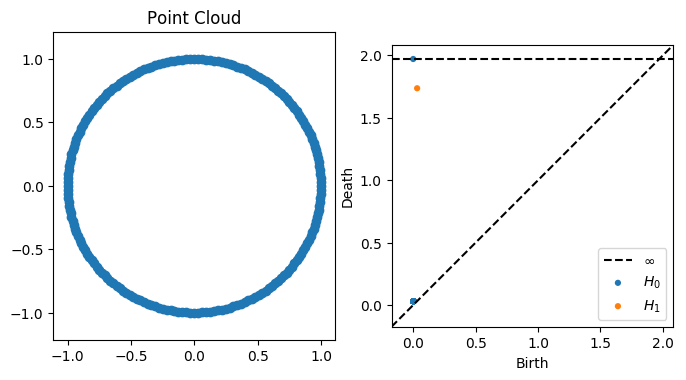

In [6]:
N = 200
t = np.linspace(0, 2*np.pi, N+1)[0:N]
X = np.zeros((N, 2))
X[:, 0] = np.cos(t)
X[:, 1] = np.sin(t)


# Compute the persistence diagram of this point cloud
dgms = ripser(X)['dgms']

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.title("Point Cloud")
plt.subplot(122)
plot_diagrams(dgms)
plt.show()

#### Question 3
What happens to H1 when you add a point that's at the center of the circle at position $(0, 0)$?


* Death time of H1 dot become equal to 1.0

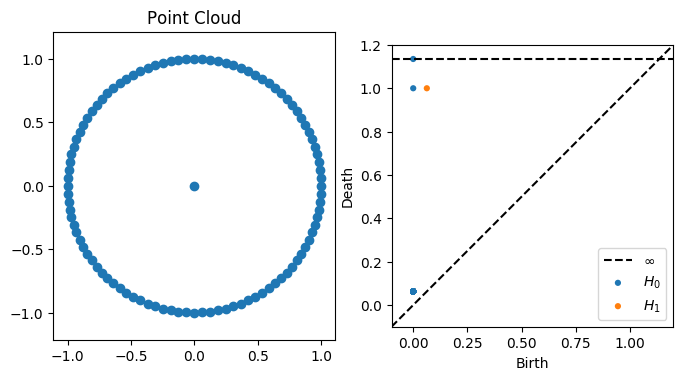

In [7]:
# Create 100 points on the unit circle
N = 100
t = np.linspace(0, 2*np.pi, N+1)[0:N]
X = np.zeros((N + 1, 2))
X[1:, 0] = np.cos(t)
X[1:, 1] = np.sin(t)


# Compute the persistence diagram of this point cloud
dgms = ripser(X)['dgms']

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.title("Point Cloud")
plt.subplot(122)
plot_diagrams(dgms)
plt.show()

#### Question 4
Change the point cloud so that there are two 1D dots with large (>1) but different persistences

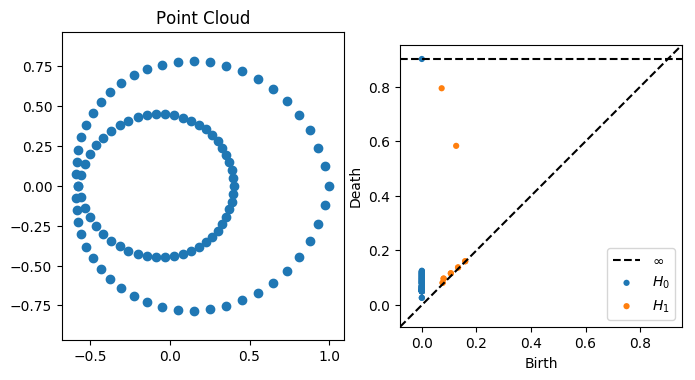

In [8]:
# Create 100 points on the unit circle
N = 100
t = np.linspace(0, 2*np.pi, N+1)[0:N]
X = np.zeros((N, 2))
X[:, 0] = np.cos(2*t)*(1- 0.6*np.sin(t/2))
X[:, 1] = np.sin(2*t)*(1- 0.6*np.sin(t/2))


# Compute the persistence diagram of this point cloud
dgms = ripser(X)['dgms']

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.title("Point Cloud")
plt.subplot(122)
plot_diagrams(dgms)
plt.show()

## Example 2: Sphere And Projective Plane

We will now randomly sample some points on the two dimensional sphere and compute persistent homology up to dimension 2, using the <i>intrinsic metric</i>, which is the arc length between points.  A point $X = (x, y, z)$ is randomly drawn from a 3D gaussian distribution 

$(x, y, z) \sim \left(\frac{1}{2 \pi}\right)^{3/2} \exp{\left( - (x^2+y^2+z^2)/2 \right) }$

and normalized to have a length of 1 (<i>why does this evenly sample on the sphere?</i>)

Note that the arc length along a unit circle is equal to the angle subtending that circle in radians. Thus, given two unit vectors on the sphere $x_1$ and $x_2$, the arc length between them is $\cos^{-1}(x_1 \cdot x_2)$.  We will implement this in code below to compute all pairwwise arc lengths between our sampled points on the sphere.  We will then compute a rips filtration up to dimension 2.

### Questions
* How many essential classes are in H1 and H2?  Does this match the homology of a sphere?

Elapsed Time:  1.9339914321899414


Text(0.5, 1.0, 'Persistence Diagrams')

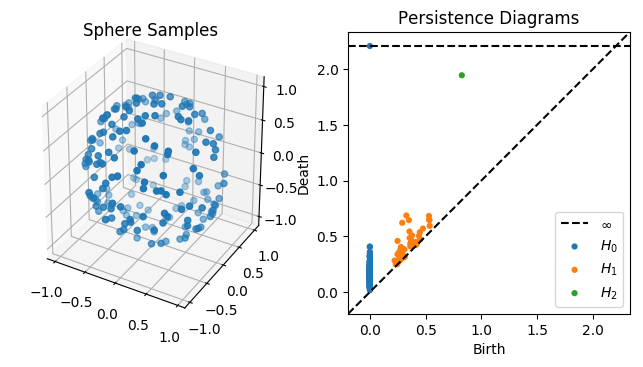

In [9]:
# Step 1: Setup the point cloud
N = 200 #Number of points
X = np.random.randn(N, 3) #Draw from 3D Gaussian
X = X/np.sqrt(np.sum(X**2, 1))[:, None] #Normalize each point to unit length

# Step 2: Compute all pairwise arc lengths between sampled points
dotProds = X.dot(X.T) #Entry ij in this matrix holds the dot product between point i and j, or cos(theta)
#The dot products should be in [-1, 1], but may leave this range due to numerical roundoff
dotProds[dotProds < -1] = -1
dotProds[dotProds > 1] = 1
DSphere = np.arccos(dotProds) #The arc length is the inverse cosine of the dot products of unit vectors
np.fill_diagonal(DSphere, 0) #Be sure distance of points to themselves is zero

tic = time.time()
dgms = ripser(DSphere, distance_matrix=True, maxdim=2)['dgms']
print("Elapsed Time: ", time.time()-tic)
fig = plt.figure(figsize=(8, 4))
ax = plt.subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.title("Sphere Samples")
plt.subplot(122)
plot_diagrams(dgms)
plt.title("Persistence Diagrams")

### Answers.
How many essential classes are in H1 and H2?  Does this match the homology of a sphere?


* We have only one long living class in the persistance diagramm. Also we know that $H_0(S^2, \mathbb{Z}/2) = H_1(S^2, \mathbb{Z}/2)= 0$ and $\operatorname{dim} H_2(S^2, \mathbb{Z}/2) = 1$. So yes, this diagram match the homology of a shpere.

### Exercises 
* Now see if you can perform a simple modification so that the sample points live on the projective plane $RP^2$ instead of the sphere; that is, re-compute the distances under the identification $x \~ -x$.

<b>Hint: The arc length between two points on the unit projective plane can never exceed $\pi/2$ radians.  As soon as the arc length goes past $\pi/2$, it starts to go back the other way</b>

### Questions
* The code below will compute persistence diagrams with $\mathbb{Z} / 2$ coefficients and $\mathbb{Z} / 3$ coefficients.  Is there a change?  Why or why not?
* Switch back to there sphere distance and look at the results with  $\mathbb{Z} / 2$ coefficients and $\mathbb{Z} / 3$ coefficients.  Is there a change?  Why or why not?



Text(0.5, 1.0, '$\\mathbb{Z}/3$')

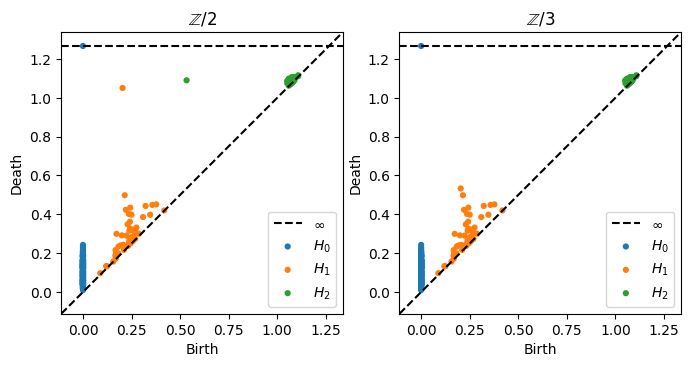

In [10]:
DRP2 = np.arccos(np.abs(dotProds)) #TODO - DONE: This line currently computes sphere distances; 
#update it so that it computes projective plane distances

np.fill_diagonal(DRP2, 0) #Be sure distance of points to themselves is zero

dgmsz2 = ripser(DRP2, distance_matrix=True, maxdim=2)['dgms']
dgmsz3 = ripser(DRP2, distance_matrix=True, maxdim=2, coeff=3)['dgms']
plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_diagrams(dgmsz2)
plt.title("$\mathbb{Z}/2$")
plt.subplot(122)
plot_diagrams(dgmsz3)
plt.title("$\mathbb{Z}/3$")


### Answers

* The code below will compute persistence diagrams with $\mathbb{Z} / 2$ coefficients and $\mathbb{Z} / 3$ coefficients.  Is there a change?  Why or why not?
* Switch back to there sphere distance and look at the results with  $\mathbb{Z} / 2$ coefficients and $\mathbb{Z} / 3$ coefficients.  Is there a change?  Why or why not?

* There are changes in persistence diagrams with $\mathbb{Z} / 2$ coefficients and $\mathbb{Z} / 3$. Let's see why. In $H_1(RP^2, \mathbb{Z} / 2)$ we have the nontrivial cycle that connects two diametrically opposite points on the sphere. This cycle has a trivial border over $\mathbb{Z} / 2$, but nontrivial border over $\mathbb{Z} / 3$. 
So we have:
$$\operatorname{dim}H_0(RP^2, \mathbb{Z}/2)= 1, \operatorname{dim}H_1(RP^2, \mathbb{Z}/2)= 1, \operatorname{dim} H_2(RP^2, \mathbb{Z}/2) = 1$$
But
$$\operatorname{dim}H_0(RP^2, \mathbb{Z}/3)= 1, \operatorname{dim}H_1(RP^2, \mathbb{Z}/3)= 0, \operatorname{dim} H_2(RP^2, \mathbb{Z}/3) = 0$$
* For the shpere there are no changes, because it has same Betti numbers over $\mathbb{Z}/2$ and $\mathbb{Z}/3$.

## Example 3: 3D Embedded Torus And Flat Torus

We will now sample points from a torus embedded in 3D and compute persistent homology up to H2.  Given a parameter $R$ whih is the radius of a circle through the center of the tube and a parameter $r$ which is the width of the tube, we use the following equation for the 3D coordinates of a point $(\theta, \phi)$, where $\theta$ is along the $r$ radius circle and $\phi$ is along the $R$ radius circle:

$x = (R + r \cos(\theta)) \cos (\phi)$

$y = (R + r \cos(\theta)) \sin (\phi)$

$z = r \sin (\theta)$

### Questions

* What happens to the persistence diagram as you vary $R$ and $r$?

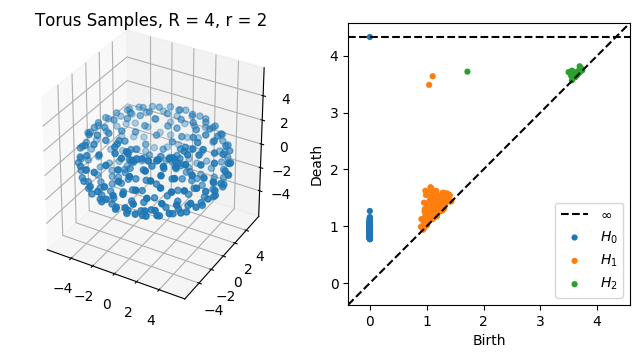

In [11]:
N = 10000 #Number of initial points in (theta, phi) space
n_perm = 300 #Number of points to evenly subsample in 3D
R = 4
r = 2
theta = np.random.rand(N)*2*np.pi
phi = np.random.rand(N)*2*np.pi
X = np.zeros((N, 3))
X[:, 0] = (R + r*np.cos(theta))*np.cos(phi)
X[:, 1] = (R + r*np.cos(theta))*np.sin(phi)
X[:, 2] = r*np.sin(theta)
xr = [np.min(X.flatten()), np.max(X.flatten())]

#Now compute persistence diagrams up to H2 on a furthest points subsample
res = ripser(X, maxdim=2, n_perm=n_perm)
dgms = res['dgms']
X = X[res['idx_perm'], :] # Take out subsampled points

plt.figure(figsize=(8, 4))
ax = plt.subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlim(xr)
ax.set_ylim(xr)
ax.set_zlim(xr)
plt.title("Torus Samples, R = %g, r = %g"%(R, r))
plt.subplot(122)
plot_diagrams(dgms)
plt.show()

Now we will sample points from a "flat torus."  The domain is $[0, 1] \times [0, 1]$, with $(x, 0)$ identified with $(x, 1)$ and $(0, y)$ identified with $(1, y)$.  The metric is simply the flat planar Euclidean metric

### Answer

* What happens to the persistence diagram as you vary $R$ and $r$?

* We can variate death time of essential classes in diagram.



### Exercise
* Fill in the code below in the function <b>get_flat_torus_dists</b>, which computes all pairwise distances of points on a flat torus.  Right now, the code simply computes the Euclidean distance between points without any identifications.

<b>Hint: You may need to use the function <u>np.amin</u></b>

In [0]:
def get_flat_torus_dists(x1, y1, x2, y2):
    """
    Compute all pairwise distances between all points (x1, y1) and points (x2, y2)
    on the flat torus [0, 1] x [0, 1]
    
    Parameters:
    x1 : ndarray (M)
        An M-length list of x coordinates of each point in the first point set
    y1 : ndarray (M)
        An M-length list of y coordinates of each point in the first point set
    x2 : ndarray (N)
        An N-length list of x coordinates of each point in the second point set
    y2 : ndarray (N)
        An N-length list of y coordinates of each point in the second point set

    Returns:
    D : ndarray (M, N)
        A distance matrix whose ijth entry is the distance along the flat torus between (x1[i], y1[i]) and (x2[j], y2[j])
    """
    
    dx = np.abs(x1[:, None] - x2[None, :])
    dy = np.abs(y1[:, None] - y2[None, :])
    
    ##TODO: FINISH THIS AND MAKE IDENTIFICATIONS

    ##
    
    return np.sqrt(dx**2 + dy**2)

Now use your function to compute a distance matrix, run ripser, and verify that you get the correct signature for a torus

[[0.06666667 0.09381068]
 [0.06666667 0.09381068]]


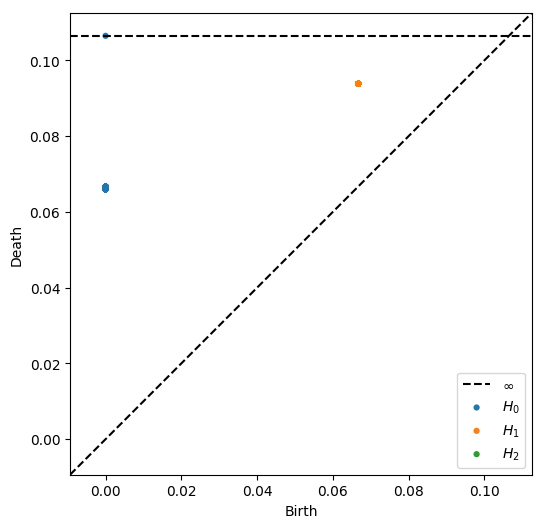

In [13]:
res = 15 #Number of points along each dimension
#Sample slightly differently so that the two persistence dots won't be the same
gridx = np.linspace(0, 1, res+1)[0:res]
gridy = gridx*0.99
x, y = np.meshgrid(gridx, gridy)
x = x.flatten()
y = y.flatten()

# Compute the distance matrix, which is the distance between
# all points and themselves
D = get_flat_torus_dists(x, y, x, y)
np.fill_diagonal(D, 0)

plt.figure(figsize=(6, 6))
dgms = ripser(D, distance_matrix=True, maxdim=2)['dgms']
I1 = dgms[1]
I1 = I1[np.argsort(I1[:, 0]-I1[:, 1])[0:2], :]
print(I1)
plot_diagrams(dgms)
plt.show()

### Answer

In [0]:
def get_flat_torus_dists(x1, y1, x2, y2):
    """
    Compute all pairwise distances between all points (x1, y1) and points (x2, y2)
    on the flat torus [0, 1] x [0, 1]
    
    Parameters:
    x1 : ndarray (M)
        An M-length list of x coordinates of each point in the first point set
    y1 : ndarray (M)
        An M-length list of y coordinates of each point in the first point set
    x2 : ndarray (N)
        An N-length list of x coordinates of each point in the second point set
    y2 : ndarray (N)
        An N-length list of y coordinates of each point in the second point set

    Returns:
    D : ndarray (M, N)
        A distance matrix whose ijth entry is the distance along the flat torus between (x1[i], y1[i]) and (x2[j], y2[j])
    """
    
    dx = np.abs(x1[:, None] - x2[None, :])
    dy = np.abs(y1[:, None] - y2[None, :])
   
    return np.amin([np.sqrt(dx**2 + dy**2), 
            np.sqrt((1 - dx)**2 + dy**2), 
            np.sqrt((1 - dx)**2 + (1 - dy**2)),
            np.sqrt(dx**2 + (1 - dy)**2),], axis=0)

[[0.06666667 0.33333334]
 [0.076      0.34      ]]


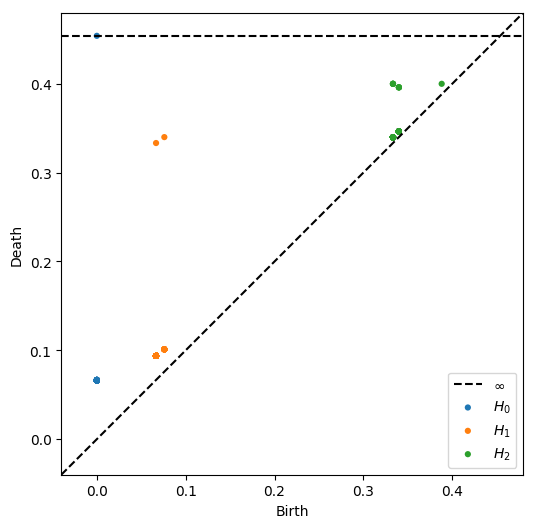

In [15]:
res = 15 #Number of points along each dimension
#Sample slightly differently so that the two persistence dots won't be the same
gridx = np.linspace(0, 1, res+1)[0:res]
gridy = gridx*0.99
x, y = np.meshgrid(gridx, gridy)
x = x.flatten()
y = y.flatten()

# Compute the distance matrix, which is the distance between
# all points and themselves
D = get_flat_torus_dists(x, y, x, y)
np.fill_diagonal(D, 0)

plt.figure(figsize=(6, 6))
dgms = ripser(D, distance_matrix=True, maxdim=2)['dgms']
I1 = dgms[1]
I1 = I1[np.argsort(I1[:, 0]-I1[:, 1])[0:2], :]
print(I1)
plot_diagrams(dgms)
plt.show()

## Example 4:  4D Embedded Klein Bottle And Flat Klein Bottle

Though we can't embed the Klein bottle in 3 dimensions, we can in 4 dimensions with the following equations, which are similar to the 3D torus case but with a twist

$x = (R + r \cos(\theta)) \cos (\phi)$

$y = (R + r \cos(\theta)) \sin (\phi)$

$z = r \sin (\theta) \cos(\phi /2)$

$w = r \sin (\theta) \sin(\phi / 2)$

Let's now run this below, computing it with both $\mathbb{Z} / 2 \mathbb{Z}$ and $\mathbb{Z} / 3 \mathbb{Z}$ coefficients

#### Questions
* What is the difference with the different coefficients?  Does the diagram look familiar to something we have already seen with $\mathbb{Z} / 2 \mathbb{Z}$ coefficients?

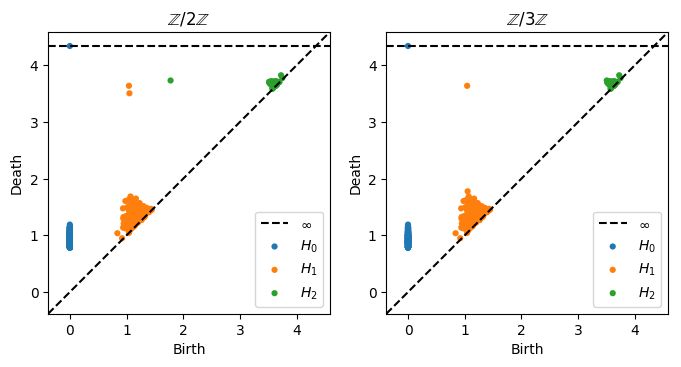

In [16]:
N = 10000 #Number of initial points in (theta, phi) space
n_perm = 300 #Number of points to evenly subsample in 3D
R = 4
r = 2
theta = np.random.rand(N)*2*np.pi
phi = np.random.rand(N)*2*np.pi
X = np.zeros((N, 4))
X[:, 0] = (R + r*np.cos(theta))*np.cos(phi)
X[:, 1] = (R + r*np.cos(theta))*np.sin(phi)
X[:, 2] = r*np.sin(theta)*np.cos(phi/2)
X[:, 3] = r*np.sin(theta)*np.sin(phi/2)

#Now compute persistence diagrams up to H2
dgms2 = ripser(X, maxdim=2, coeff=2, n_perm=n_perm)['dgms']
dgms3 = ripser(X, maxdim=2, coeff=3, n_perm=n_perm)['dgms']

plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_diagrams(dgms2)
plt.title("$\mathbb{Z} / 2 \mathbb{Z}$")
plt.subplot(122)
plot_diagrams(dgms3)
plt.title("$\mathbb{Z} / 3 \mathbb{Z}$")
plt.show()

#### Answers
* What is the difference with the different coefficients?  Does the diagram look familiar to something we have already seen with $\mathbb{Z} / 2 \mathbb{Z}$ coefficients?

* Result with $\mathbb{Z} / 2 \mathbb{Z}$ similar to the torus. But over $\mathbb{Z} / 3 \mathbb{Z}$ homology of Klein Bottle are different: 
$$\operatorname{dim}H_0(K, \mathbb{Z}/2)= 1, \operatorname{dim}H_1(K, \mathbb{Z}/2)= 2, \operatorname{dim} H_2(K, \mathbb{Z}/2) = 1$$
But
$$\operatorname{dim}H_0(K, \mathbb{Z}/3)= 1, \operatorname{dim}H_1(K, \mathbb{Z}/3)= 1, \operatorname{dim} H_2(K, \mathbb{Z}/3) = 0$$

Another way to obtain the Klein bottle is by a quotient map of the torus.  For example, for the torus $[0, 1] \times [0, 1]$, make the identification $(x, y) \sim (x + 0.5, 1-y)$.  

#### Exercise
* Create a function below that computes the distance from one point set on the Klein bottle to another point set on the Klein bottle.  
<b>Hint:</b> invoke your function to compute distances on the torus, then apply the quotient map

In [0]:
def get_flat_klein_dists(x1, y1, x2, y2):
    """
    Compute all pairwise distances between all points (x1, y1) and points (x2, y2)
    on the flat torus [0, 1] x [0, 1]
    
    Parameters:
    x1 : ndarray (M)
        An M-length list of x coordinates of each point in the first point set
    y1 : ndarray (M)
        An M-length list of y coordinates of each point in the first point set
    x2 : ndarray (N)
        An N-length list of x coordinates of each point in the second point set
    y2 : ndarray (N)
        An N-length list of y coordinates of each point in the second point set

    Returns:
    D : ndarray (M, N)
        A distance matrix whose ijth entry is the distance along the flat Klein bottle
        between (x1[i], y1[i]) and (x2[j], y2[j]), where the flat Klein bottle is
        defined to be a quotient map over the torus $[0, 1] \times [0, 1]$
    """
    
    D = get_flat_torus_dists(x1, y1, x2, y2)
    # TODO: Finish this; apply quotients on the torus to turn
    # it into a Klein bottle

    return D

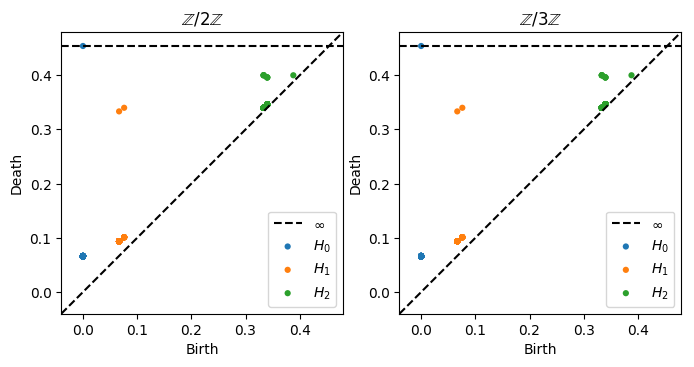

In [18]:
res = 15 #Number of points along each dimension
#Sample slightly differently so that the two persistence dots won't be the same
gridx = np.linspace(0, 1, res+1)[0:res]
gridy = gridx*0.99 #Only need to sample half in the y direction since there's a double cover
x, y = np.meshgrid(gridx, gridy)
x = x.flatten()
y = y.flatten()

# Compute the distance matrix, which is the distance between
# all points and themselves
D = get_flat_klein_dists(x, y, x, y)
np.fill_diagonal(D, 0)

plt.figure(figsize=(8, 4))
dgmsz2 = ripser(D, distance_matrix=True, maxdim=2)['dgms']
dgmsz3 = ripser(D, distance_matrix=True, maxdim=2, coeff=3)['dgms']
plt.subplot(121)
plot_diagrams(dgmsz2)
plt.title("$\mathbb{Z} / 2 \mathbb{Z}$")
plt.subplot(122)
plot_diagrams(dgmsz3)
plt.title("$\mathbb{Z} / 3 \mathbb{Z}$")
plt.show()

### Answers

In [0]:
def get_flat_klein_dists(x1, y1, x2, y2):
    """
    Compute all pairwise distances between all points (x1, y1) and points (x2, y2)
    on the flat torus [0, 1] x [0, 1]
    
    Parameters:
    x1 : ndarray (M)
        An M-length list of x coordinates of each point in the first point set
    y1 : ndarray (M)
        An M-length list of y coordinates of each point in the first point set
    x2 : ndarray (N)
        An N-length list of x coordinates of each point in the second point set
    y2 : ndarray (N)
        An N-length list of y coordinates of each point in the second point set

    Returns:
    D : ndarray (M, N)
        A distance matrix whose ijth entry is the distance along the flat Klein bottle
        between (x1[i], y1[i]) and (x2[j], y2[j]), where the flat Klein bottle is
        defined to be a quotient map over the torus $[0, 1] \times [0, 1]$
    """
    
    D = np.minimum(get_flat_torus_dists(x1, y1, x2, y2), get_flat_torus_dists(x1 +0.5 - (x1 + 0.5), 1 - y1, x2, y2))
    # TODO - DONE: Finish this; apply quotients on the torus to turn
    # it into a Klein bottle

    return D
    

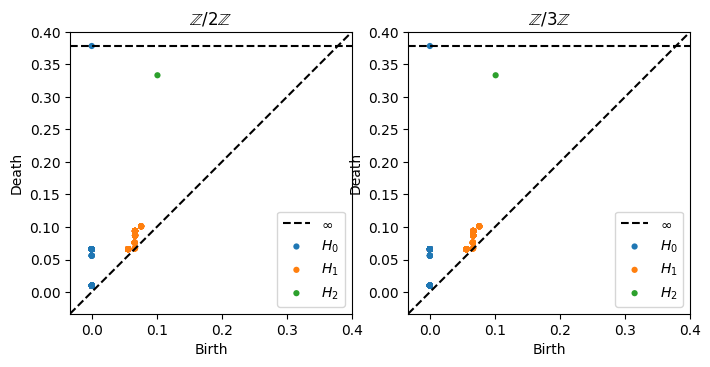

In [20]:
res = 15 #Number of points along each dimension
#Sample slightly differently so that the two persistence dots won't be the same
gridx = np.linspace(0, 1, res+1)[0:res]
gridy = gridx*0.99 #Only need to sample half in the y direction since there's a double cover
x, y = np.meshgrid(gridx, gridy)
x = x.flatten()
y = y.flatten()

# Compute the distance matrix, which is the distance between
# all points and themselves
D = get_flat_klein_dists(x, y, x, y)
np.fill_diagonal(D, 0)

plt.figure(figsize=(8, 4))
dgmsz2 = ripser(D, distance_matrix=True, maxdim=2)['dgms']
dgmsz3 = ripser(D, distance_matrix=True, maxdim=2, coeff=3)['dgms']
plt.subplot(121)
plot_diagrams(dgmsz2)
plt.title("$\mathbb{Z} / 2 \mathbb{Z}$")
plt.subplot(122)
plot_diagrams(dgmsz3)
plt.title("$\mathbb{Z} / 3 \mathbb{Z}$")
plt.show()

In [21]:
x

array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
       0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
       0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
       0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
       0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
       0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
       0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
       0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
       0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
       0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
       0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
       0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
       0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
       0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
       0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333

## Example 5: A Twisty Curve

For our final example in this module, let's take a closed loop that lives on the 3D torus from example 3 which travels twice around the $R$ radius circle for every once it travels around the $r$ radius circle.  We will compute persistent H1 with $\mathbb{Z} / 2 \mathbb{Z}$ and $\mathbb{Z} / 3 \mathbb{Z}$ coefficients.

### Questions
* What is the relationship between the H1 diagram with $\mathbb{Z} / 2 \mathbb{Z}$ coefficients and $\mathbb{Z} / 3 \mathbb{Z}$ coefficients?  Can you relate the birth and death times between the two diagrams with a simple formula?

* What shape does this curve bound?  Can you explain the birth and death times in the $\mathbb{Z} / 2 \mathbb{Z}$ diagram in terms of this shape?


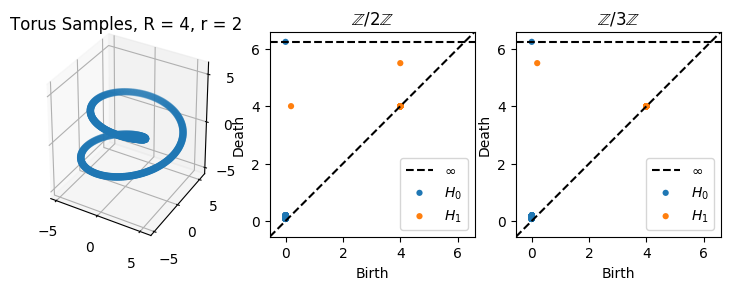

In [22]:
NPoints = 400
R = 4
r = 2
theta = np.linspace(0, 2*np.pi, NPoints+1)[0:NPoints]
phi = theta*2
X = np.zeros((NPoints, 3))
X[:, 0] = (R + r*np.cos(theta))*np.cos(phi)
X[:, 1] = (R + r*np.cos(theta))*np.sin(phi)
X[:, 2] = r*np.sin(theta)
xr = [np.min(X.flatten()), np.max(X.flatten())]

#Now compute persistence diagrams with Z/2 coefficients
dgms2 = ripser(X, maxdim=1, coeff=2)['dgms']
dgms3 = ripser(X, maxdim=1, coeff=3)['dgms']

plt.figure(figsize=(9, 3))
ax = plt.subplot(131, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlim(xr)
ax.set_ylim(xr)
ax.set_zlim(xr)
plt.title("Torus Samples, R = %g, r = %g"%(R, r))
plt.subplot(132)
plot_diagrams(dgms2)
plt.title("$\mathbb{Z} / 2 \mathbb{Z}$")
plt.subplot(133)
plot_diagrams(dgms3)
plt.title("$\mathbb{Z} / 3 \mathbb{Z}$")
plt.show()

### Answers

* What is the relationship between the H1 diagram with $\mathbb{Z} / 2 \mathbb{Z}$ coefficients and $\mathbb{Z} / 3 \mathbb{Z}$ coefficients?  Can you relate the birth and death times between the two diagrams with a simple formula?

* What shape does this curve bound?  Can you explain the birth and death times in the $\mathbb{Z} / 2 \mathbb{Z}$ diagram in terms of this shape?

* For $\mathbb{Z} / 2 \mathbb{Z}$ we see 2 classes in H_1, and when first die, second birth. Let birth and death time of first is $[T_1, T_2]$ and for second -- $[T_2, T_3]$. So in $\mathbb{Z} / 3 \mathbb{Z}$ we have just one $H_1$ class with birth and death time of first is $[T_1, T_3]$.

* Shape of this curve clouse to loop, in moment $T_2$ class from $H_1$, coresponding to all curve, transform to inner cycle of the curve.